In [1]:
%matplotlib notebook
from matplotlib import pyplot as plot

In [2]:
import numpy

In [3]:
from sklearn.datasets import make_blobs
n_dim = 2
x, y = make_blobs(n_samples=100, n_features=n_dim, centers=[[1,1],[-1,-1],[1,-1],[-1,1]], shuffle=True, cluster_std=0.3)

<IPython.core.display.Javascript object>


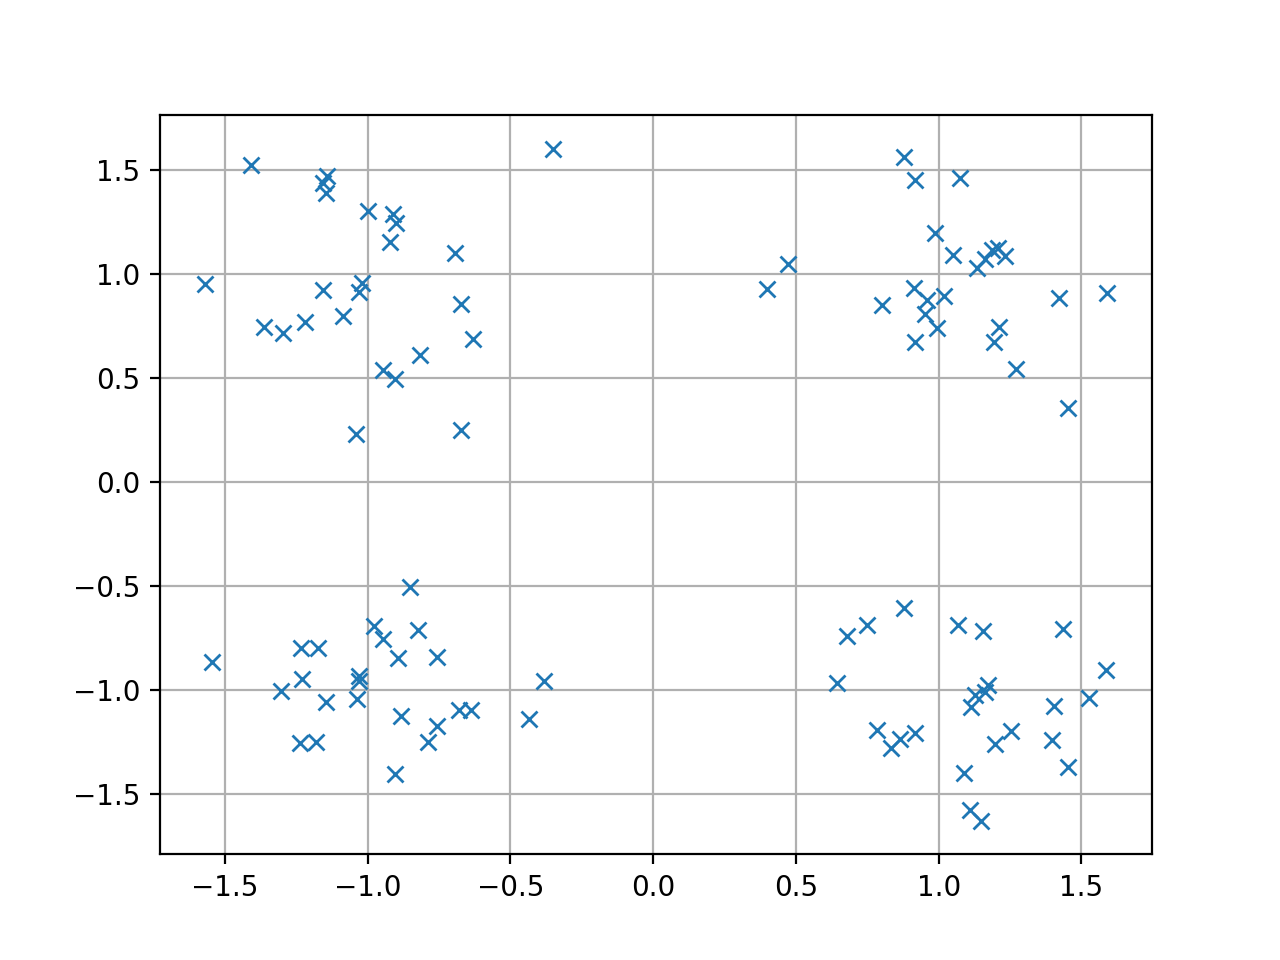

In [4]:
plot.figure()
plot.plot(x[:,0], x[:,1], 'x')
plot.grid('on')
plot.show()

In [5]:
K = 4

In [6]:
W = numpy.random.randn(n_dim, K)

<IPython.core.display.Javascript object>


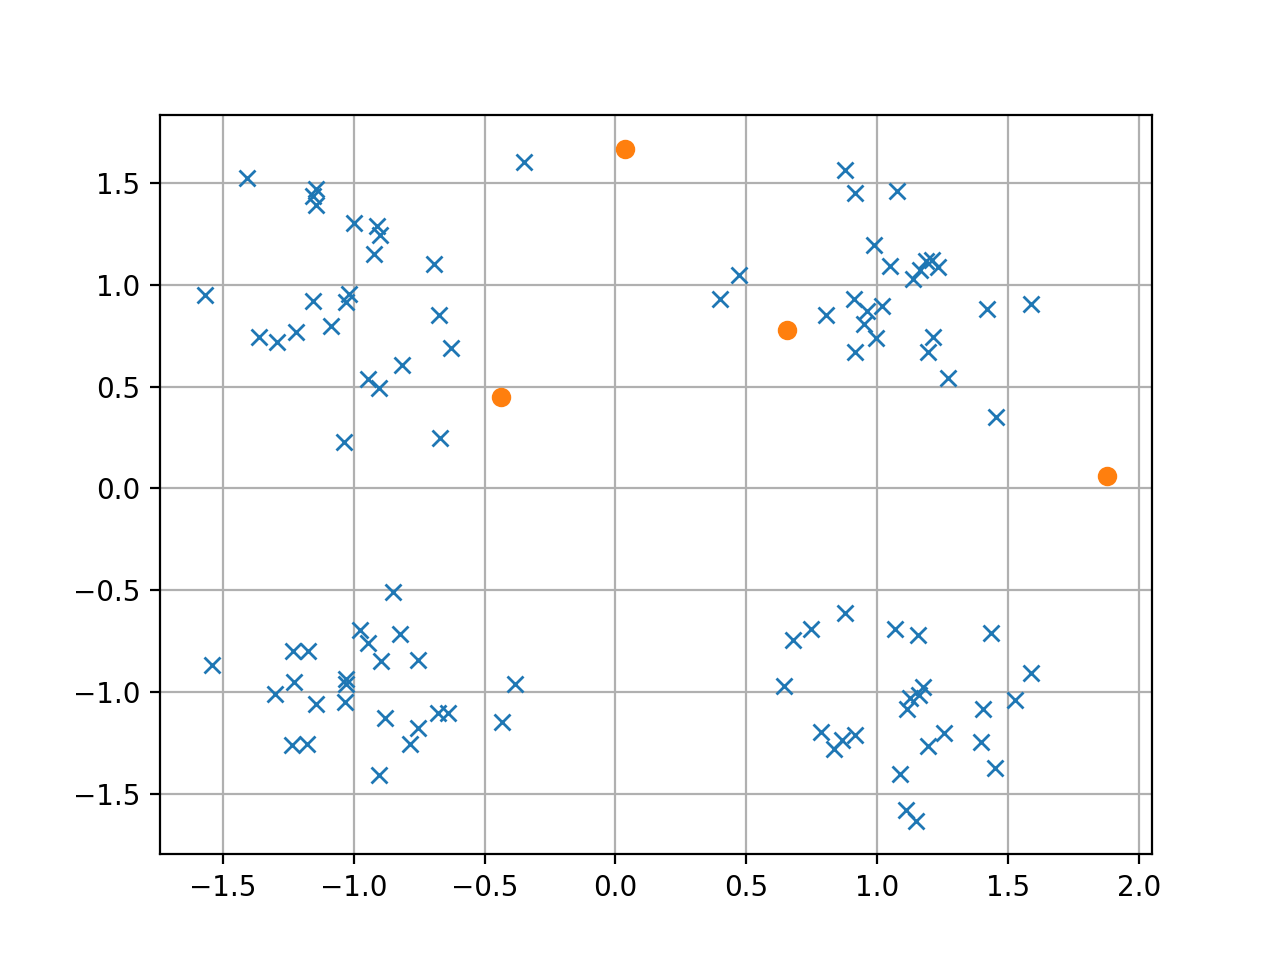

In [7]:
plot.figure()
plot.plot(x[:,0], x[:,1], 'x')
plot.plot(W[0,:], W[1,:], 'o')
plot.grid('on')
plot.show()

In [8]:
Z = numpy.round(numpy.random.rand(x.shape[0]) * (K-1))

In [9]:
colors = ['r', 'g', 'b', 'k']

<IPython.core.display.Javascript object>


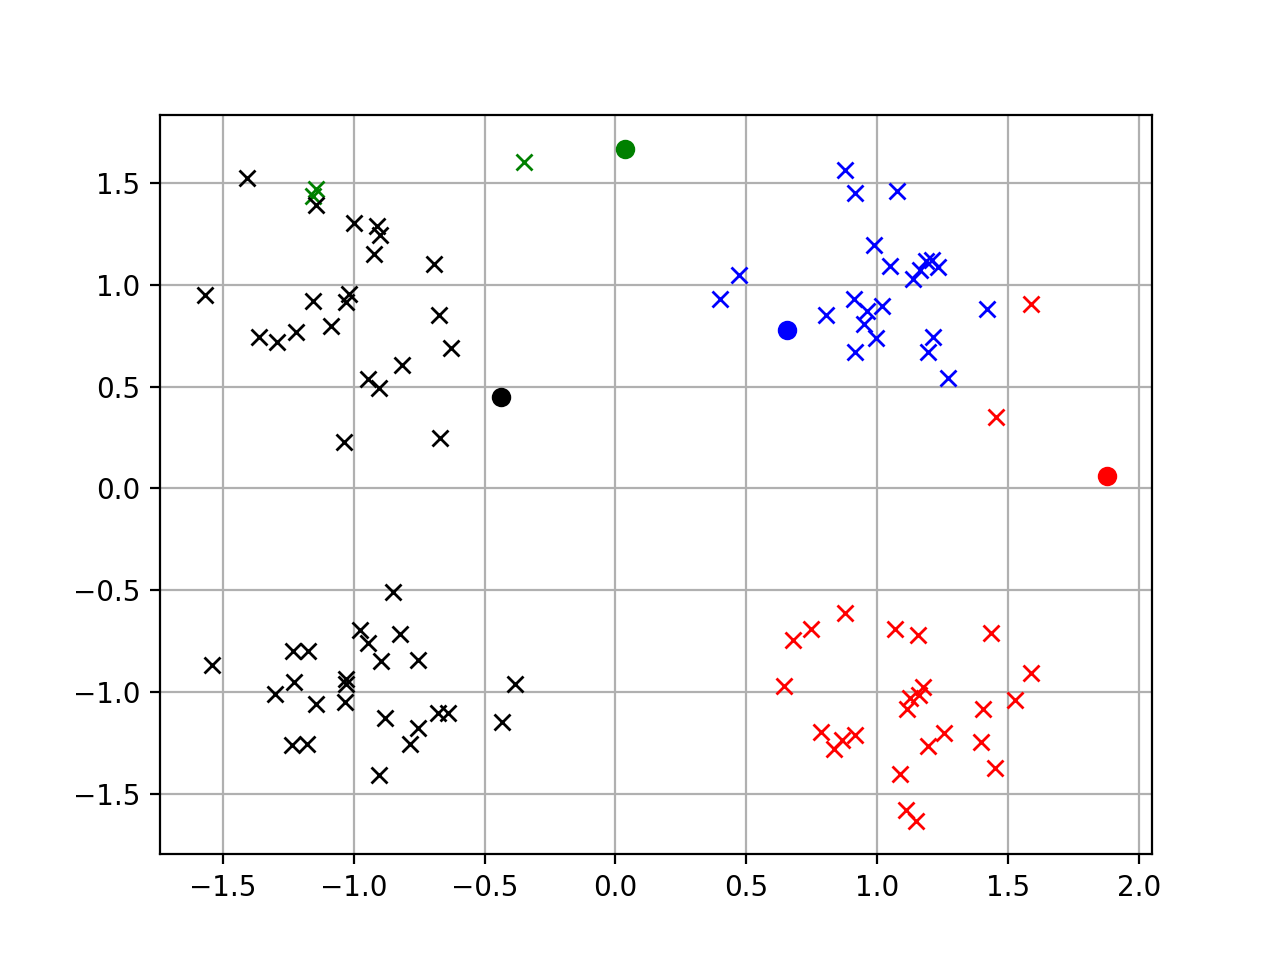

In [10]:
# first step: find the best assignment
def expectation(W, x):
    return ((x[:,:,None] - W[None,:,:]) ** 2).sum(1).argmin(-1)

Z = expectation(W, x)

plot.figure()
for kk in xrange(K):
    plot.plot(x[Z == kk,0], x[Z == kk,1], colors[kk]+'x')
    plot.plot(W[0,kk], W[1,kk], colors[kk]+'o')
plot.grid('on')
plot.show()

<IPython.core.display.Javascript object>


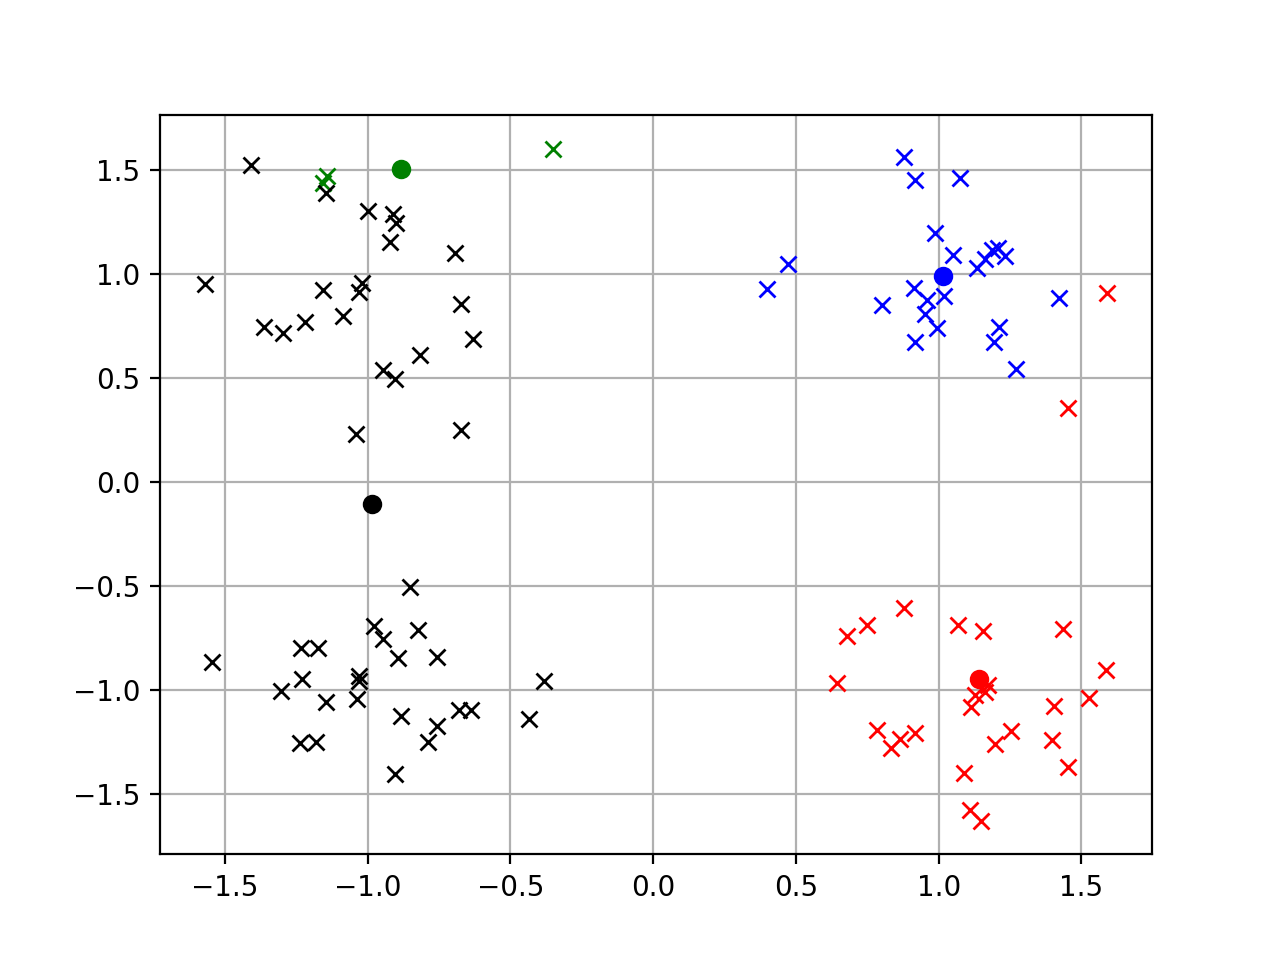

In [11]:
# second step: find the centroids
def maximization(Z, x, K=4):
    W = numpy.zeros((x.shape[1], K))
    for kk in xrange(K):
        W[:,kk] = x[Z==kk,:].mean(0)
    return W

W = maximization(Z, x)

plot.figure()
for kk in xrange(K):
    plot.plot(x[Z == kk,0], x[Z == kk,1], colors[kk]+'x')
    plot.plot(W[0,kk], W[1,kk], colors[kk]+'o')
plot.grid('on')
plot.show()

In [12]:
max_iter = 100

Z0 = numpy.copy(Z)
W0 = numpy.copy(W)

eps = 1e-5

for ii in xrange(max_iter):
    
    Z = expectation(W, x)
    W = maximization(Z, x)
    
    if ((Z0 - Z) ** 2).sum() < eps and ((W0 - W) ** 2).sum() < eps:
        print 'Done at iteration', ii
        break
    
    Z0 = numpy.copy(Z)
    W0 = numpy.copy(W)

Done at iteration 2


<IPython.core.display.Javascript object>


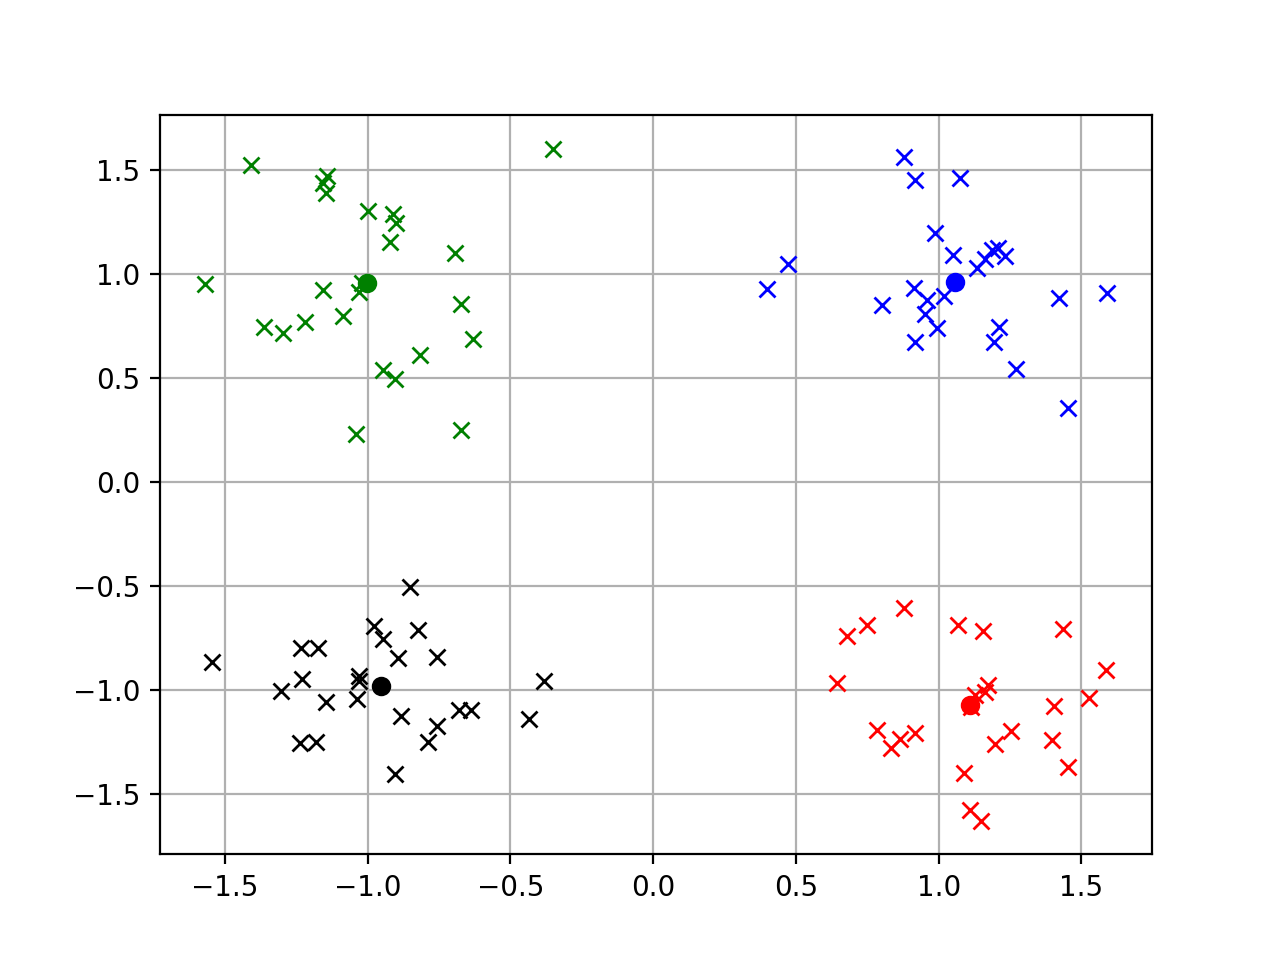

In [13]:
# final
plot.figure()
for kk in xrange(K):
    plot.plot(x[Z == kk,0], x[Z == kk,1], colors[kk]+'x')
    plot.plot(W[0,kk], W[1,kk], colors[kk]+'o')
plot.grid('on')
plot.show()